#### Test Result ###
# General Infomation
Threads: 8
Generation Size: 8
Symbol Size: 67108864
# Result information
Amount of results: 1000
Average: 245.245817

#### Test Result ###
# General Infomation
Threads: 16
Generation Size: 16
Symbol Size: 33554432
# Result information
Amount of results: 1000
Average: 261.164746

#### Test Result ###
# General Infomation
Threads: 32
Generation Size: 32
Symbol Size: 16777216
# Result information
Amount of results: 1000
Average: 126.748251

#### Test Result ###
# General Infomation
Threads: 64
Generation Size: 64
Symbol Size: 8388608
# Result information
Amount of results: 1000
Average: 119.12535

#### Test Result ###
# General Infomation
Threads: 256
Generation Size: 256
Symbol Size: 2097152
# Result information
Amount of results: 1000
Average: 172.196646

#### Test Result ###
# General Infomation
Threads: 256
Generation Size: 256
Symbol Size: 2097152
# Result information
Amount of results: 1000
Average: 172.196646

[245.24581700000002, 261.16474

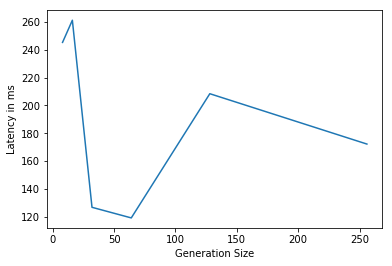

In [2]:
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

class Result:
    
    threads = -1
    symbol_size = -1
    symbols = -1
    def __init__(self, arr):
        data = [entry.split(',') for entry in arr]
        self.results = list()
        self.threads = data[0][3]
        self.symbols = data[0][4]
        self.symbol_size = data[0][5]  
        self.__get_results(arr)
        
        
    def __get_results(self, arr):
        for entry in arr:
            self.results.append(
            {'start_time': long((entry.split(','))[0]),
             'end_time': long((entry.split(','))[1]),
             'diff': long(entry.split(',')[2])
            })
            
    def average(self,unit=None):
        result = 0
        for entry in self.results:
            result = result + entry.get('diff', 0)
            # print result
        result = float(result) / len(self.results)
        if unit is None:
            return result
        elif unit == 'ms':
            return result / 1000
        
    def maximum(self, unit=None):
        values = [entry.get('diff') for entry in self.results]

        if unit == None:
            return max(values)
        elif unit == 'ms':
            return float(max(values))/1000
    
    def minimum(self, unit=None):
        values = [entry.get('diff') for entry in self.results]
        if unit == None:
            return min(values)
        elif unit == 'ms':
            return float(min(values))/1000  
        
    def diff_look_up(self, diff):
        for entry in self.results:
            if entry.get('diff') == diff:
                return entry
        return None
        
    def result_report(self, unit=None):
        text = '#### Test Result ###'
        text = text + '\n' + '# General Infomation'
        text = text + '\n' + 'Threads: {threads}'.format(threads=self.threads)
        text = text + '\n' + 'Generation Size: {symbols}'.format(symbols=self.symbols)
        text = text + '\n' + 'Symbol Size: {symbol_size}'.format(symbol_size=self.symbol_size)
        text = text + '\n' + '# Result information'
        text = text + '\n' + 'Amount of results: {res}'.format(res=len(self.results))
      #  text = text + '\n' + 'Min: {minn}'.format(minn=self.minimum(unit))
      #  text = text + '\n' + 'Max: {maxz}'.format(maxz=self.maximum(unit))
        text = text + '\n' + 'Average: {avg}'.format(avg=self.average(unit))
        return text

def read_file(file_name):
    with open(file_name) as file:
        content = file.readlines()
    content = [line.strip() for line in content]
    return content

def plot_results(results, file_name):
    
    averages = [res.average(unit='ms') for res in results]
    print(averages)
    generations = [res.symbols for res in results]
    print(generations)
    my_xsticks = ['8', '16', '32', '64', '128', '256']
    pd.DataFrame
    fig = plt.figure()
#    plt.xticks(generations, generations)
    plt.plot(generations, averages)
    # plt.yscale("log", nonposy='clip')
    plt.ylabel('Latency in ms')
    plt.xlabel('Generation Size')
    fig.savefig('../results/smart_encoder/{}'.format(file_name))
    plt.show()

res = Result(read_file('../results/simple_encoder/1524667602_simple_encoder_benchmark_8_8_67108864'))
res1 = Result(read_file('../results/simple_encoder/1524659171_simple_encoder_benchmark_8_16_33554432'))
res2 = Result(read_file('../results/simple_encoder/1524684183_simple_encoder_benchmark_8_32_16777216'))
res3 = Result(read_file('../results/simple_encoder/1524675890_simple_encoder_benchmark_8_64_8388608'))
res4 = Result(read_file('../results/simple_encoder/1524692593_simple_encoder_benchmark_8_128_4194304'))
res5 = Result(read_file('../results/simple_encoder/1524650729_simple_encoder_benchmark_8_256_2097152'))

print res.result_report(unit='ms')
print ''

print res1.result_report(unit='ms')
print ''

print res2.result_report(unit='ms')
print ''

print res3.result_report(unit='ms')
print ''

print res5.result_report(unit='ms')
print ''

print res5.result_report(unit='ms')
print ''

results = [res, res1, res2, res3, res4, res5]
plot_results(results, 'simple_encoder_data_size_512.eps')